In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle 
from os import path
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model
from datetime import datetime
import math,time,sys
import random
# representation of model layers
from keras.utils.vis_utils import plot_model

In [2]:
# dataset doesn't have column names, so we have to provide it
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [3]:
# importing dataset
#data = pd.read_csv('/content/drive/MyDrive/NSL-KDD/KDDTrain+.txt',header=None, names=col_names)
data = pd.read_csv('/kaggle/input/nslkdd/KDDTrain+.txt',header=None, names=col_names)

In [4]:
# print dataset
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [5]:
# remove attribute 'difficulty_level'
data.drop(['difficulty_level'],axis=1,inplace=True)
data.shape

(125973, 42)

In [6]:
# descriptive statistics of dataset
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# number of attack labels 
data['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [8]:
# changing attack labels to their respective attack class
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail',
       'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [9]:
# calling change_label() function
change_label(data)

In [10]:
# distribution of attack classes
data.label.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64

In [11]:
# selecting numeric attributes columns from data
numeric_col = data.select_dtypes(include='number').columns

In [12]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [13]:
# data before normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [14]:
# calling the normalization() function
data = normalization(data.copy(),numeric_col)

In [15]:
# data after normalization
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,Dos
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal


In [16]:
# selecting categorical data attributes
cat_col = ['protocol_type','service','flag']

In [17]:
# creating a dataframe with only categorical attributes
categorical = data[cat_col]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [18]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [20]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [21]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label

In [22]:
np.save("/kaggle/working/le1_classes.npy",le1.classes_,allow_pickle=True)

In [23]:
# dataset with binary labels and label encoded column
bin_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal,1
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,abnormal,0
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal,1
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1


In [24]:
# one-hot-encoding attack label
bin_data = pd.get_dummies(bin_data,columns=['label'],prefix="",prefix_sep="") 
bin_data['label'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion,abnormal,normal,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1,0,1,normal
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1,0,1,normal
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal
125969,-0.107178,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1,0,1,normal
125970,-0.110249,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,1,0,1,normal
125971,-0.110249,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0,1,0,abnormal


In [25]:
# selecting attributes found by using pearson correlation coefficient
numeric_bin = bin_data[['count','srv_serror_rate','serror_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
                         'logged_in','dst_host_same_srv_rate','dst_host_srv_count','same_srv_rate']]

In [26]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_bin = numeric_bin.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
bin_data = numeric_bin.join(bin_data[['intrusion','abnormal','normal','label']])

In [27]:
X = bin_data.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [28]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [29]:
def setWeights(X):
 Len=0
 for i in range(0,len(mlp.layers)):
       a=mlp.layers[i].get_weights()[0].shape
       weights=X[Len:(Len+mlp.layers[i].get_weights()[0].flatten().shape[0])]
       weights=np.reshape(weights,a) 
       Len=Len+mlp.layers[i].get_weights()[0].flatten().shape[0]
       a=mlp.layers[i].get_weights()[1].shape
       bias=X[Len:(Len+mlp.layers[i].get_weights()[1].flatten().shape[0])]
       bias=np.reshape(bias,a) 
       Len=Len+mlp.layers[i].get_weights()[1].flatten().shape[0]
       mlp.layers[i].set_weights([weights,bias])


In [30]:
def Fobj():
    mlp = Sequential() # creating model
    # adding input layer and first layer with 50 neurons
    mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
    # output layer with sigmoid activation
    mlp.add(Dense(units=1,activation='sigmoid'))
    return mlp

In [31]:
mlp=Fobj()
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
dimension=0;
for i in range(len(mlp.get_weights())):
       dimension=dimension+mlp.get_weights()[i].flatten().shape[0]
poolSize = 20# Population size
population=np.zeros((poolSize,dimension))
Fit=np.ones(poolSize)*float('inf')
dimension

2022-12-16 16:02:53.559503: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


4751

In [32]:
import numpy as np
import pandas as pd
import random
import math,time,sys
from matplotlib import pyplot
from operator import mod
L_bounds=-10;
U_bounds=10;
def initialize():
    for i in range(poolSize):
        for j in range(dimension):
            population[i][j]=(L_bounds+np.random.rand(1)*(U_bounds-L_bounds))
        setWeights(population[i,:])
        print("------------Solution",i,"-------------")
        score=mlp.evaluate(X_train, y_train, verbose = 1) 
        Fit[i]= score[0]
    

In [33]:
def check_boundaries(X):
    for j in range(dimension):
        if population[j]>U_bounds:
            population[j]=(L_bounds+np.random.random(1)*(U_bounds-L_bounds))
        elif  population[j]<L_bounds:
            population[j]=(L_bounds+np.random.random(1)*(U_bounds-L_bounds))

In [34]:
import copy
def allfit(population):
    x=np.shape(population)[0]
    loss_value=np.zeros(x)
    for i in range(x):
        loss_value[i]=fitness(population[i])
    return loss_value
def fitness(particle):
    setWeights(particle) 
    score = mlp.evaluate(X_train, y_train, verbose = 0)
    print("Accuracy:",score[1]," Loss: ",score[0])
    newFit= score[0]
    return newFit

def EO(population,max_iter,partCount,poolSize,dimension):
    initialize()
    eo=list()
    bF=float('inf')
    bPos=[]
    ceq1=np.zeros(dimension)
    ceq2=np.zeros(dimension)
    ceq3=np.zeros(dimension)
    ceq4=np.zeros(dimension)
    avg_ceq=np.zeros(dimension)
    fit_ceq1=math.inf
    fit_ceq2=math.inf
    fit_ceq3=math.inf
    fit_ceq4=math.inf
    avg_fit=math.inf
    accList = allfit(population)
    for curriter in range(max_iter):
            popnew = np.zeros((partCount,dimension))
            for i in range(partCount):
                if accList[i]<fit_ceq1 :
                    fit_ceq1=accList[i]
                    ceq1=population[i].copy()
                elif accList[i]>fit_ceq1 and accList[i]<fit_ceq2 :
                    fit_ceq2=accList[i]
                    ceq2=population[i].copy()
                elif accList[i]>fit_ceq1 and accList[i]>fit_ceq2 and accList[i]<fit_ceq3 :
                    fit_ceq3=accList[i]
                    ceq3=population[i].copy()
                elif accList[i]>fit_ceq1 and accList[i]>fit_ceq2 and accList[i]>fit_ceq3 and accList[i]<fit_ceq4 :
                    fit_ceq4=accList[i]
                    ceq4=population[i].copy()
            avg_ceq=ceq1.copy()
            for i in range (dimension):
                avg_ceq[i]=(avg_ceq[i]+ceq2[i]+ceq3[i]+ceq4[i])/4
            avg_fit=fitness(avg_ceq)
            #Memory Saving
            t = (1 - (curriter/max_iter))**(a2*curriter/max_iter)
            for i in range(partCount):
                x=random.randint(0,5)
                if x==0 : 
                    Ceq = ceq1
                elif x==1 :
                    Ceq=ceq2
                elif x==2:
                     Ceq=ceq3
                elif x==3 :
                    Ceq=ceq4 
                elif x==4 :
                    Ceq=avg_ceq 
                lambdaVec = np.zeros(np.shape(Ceq))
                rVec = np.zeros(np.shape(Ceq))
                for j in range(dimension):
                    lambdaVec[j] = random.random()
                    rVec[j] = random.random()

                FVec = np.zeros(np.shape(Ceq))
                for j in range(dimension):
                    x = -1*lambdaVec[j]*t 
                    x = math.exp(x) - 1
                    x = a1 * np.sign(rVec[j] - 0.5) * x
                r1 = random.random()
                r2 = random.random()
                if r2 < GP:
                    GCP = 0
                else:
                    GCP = 0.5 * r1
                G0 = np.zeros(np.shape(Ceq))
                G = np.zeros(np.shape(Ceq))
                for j in range(dimension):
                    G0[j] = GCP * (Ceq[j] - lambdaVec[j]*population[i][j])
                    G[j] = G0[j]*FVec[j]
                for j in range(dimension):
                    popnew[i][j] = Ceq[j] + (population[i][j]- Ceq[j])*FVec[j] + G[j]*(1 - FVec[j])/lambdaVec[j]
                new_fit=fitness(popnew[i])
                if new_fit < accList[i]:
                    accList[i]=new_fit
                    population[i]=popnew[i].copy()
                if accList[i]<bF:
                    bF=accList[i]
                    bPos=copy.copy(population[i]);
            print("The best so-far Fitness value obtained by EO at iteration ",curriter,"==",bF)
    eo.append(bF);
    eo.append(bPos)
    return eo

In [35]:
a1=2
a2=1
partCount=10
GP=0.5
avgLoss=0
bPos=[]
max_iter=6
eo=EO(population,max_iter,partCount,poolSize,dimension)
avgLoss=avgLoss+eo[0]
bPos=eo[1]

------------Solution 0 -------------


2022-12-16 16:02:53.990988: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


2953/2953 [==============================] - 4s 1ms/step - loss: 109.1858 - accuracy: 0.3779
------------Solution 1 -------------
2953/2953 [==============================] - 4s 1ms/step - loss: 258.3829 - accuracy: 0.5889
------------Solution 2 -------------
2953/2953 [==============================] - 4s 1ms/step - loss: 147.8683 - accuracy: 0.4217
------------Solution 3 -------------
2953/2953 [==============================] - 4s 1ms/step - loss: 75.3684 - accuracy: 0.5386
------------Solution 4 -------------
2953/2953 [==============================] - 4s 1ms/step - loss: 74.2247 - accuracy: 0.6422
------------Solution 5 -------------
2953/2953 [==============================] - 4s 1ms/step - loss: 283.0241 - accuracy: 0.4513
------------Solution 6 -------------
2953/2953 [==============================] - 4s 1ms/step - loss: 288.8985 - accuracy: 0.5990
------------Solution 7 -------------
2953/2953 [==============================] - 4s 1ms/step - loss: 182.6005 - accuracy: 0.3622

In [36]:
setWeights(bPos)
history=mlp.fit(X_train,y_train,epochs=100,batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 1s 10ms/step - loss: 57.0224 - accuracy: 0.3153 - val_loss: 51.2185 - val_accuracy: 0.3314
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 47.5220 - accuracy: 0.3483 - val_loss: 42.3230 - val_accuracy: 0.4531
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 40.3191 - accuracy: 0.5432 - val_loss: 37.6705 - val_accuracy: 0.6064
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 36.5448 - accuracy: 0.6256 - val_loss: 34.5585 - val_accuracy: 0.6427
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 33.6186 - accuracy: 0.6513 - val_loss: 31.8107 - val_accuracy: 0.6573
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 30.9460 - accuracy: 0.6637 - val_loss: 29.2559 - val_accuracy: 0.6689
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 28.4612 - accuracy: 0.6780 - val_loss: 26.8842 - val_accuracy: 0.686

***** Model Evaluations Details ******** 

985/985 [==============================] - 1s 1ms/step - loss: 0.6517 - accuracy: 0.9602
Test loss, Test acc :  [0.6516795754432678, 0.9601829051971436]


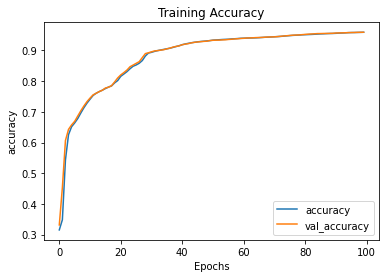

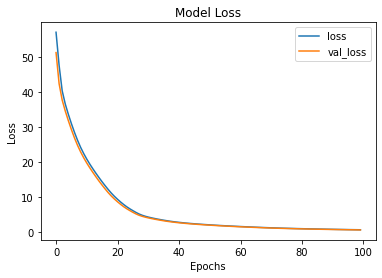

In [37]:
def evaluate_model(X_test , y_test):
    results = mlp.evaluate(X_test, y_test, batch_size=32)
    return results

print("***** Model Evaluations Details ******** \n")
print("Test loss, Test acc : " , evaluate_model(X_test , y_test)) 

def Acc_Loss_Graph(history):
    # converting hsitory to dataframe
    pd.DataFrame(history.history)

    pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
    plt.title('Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')

    pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

Acc_Loss_Graph(history)